# 정규표현식

#### 참고: wikidoc
 - https://wikidocs.net/1642
 - https://wikidocs.net/4308

예) 

주민등록번호를 포함하고 있는 텍스트가 있다. 이 텍스트에 포함된 모든 주민등록번호의 뒷자리를 * 문자로 변경해 보자.
우선 정규식을 전혀 모르면 다음과 같은 순서로 프로그램을 작성해야 할 것이다.

1. 전체 텍스트를 공백 문자로 나눈다(split).
2. 나뉜 단어가 주민등록번호 형식인지 조사한다.
3. 단어가 주민등록번호 형식이라면 뒷자리를 *로 변환한다.
4. 나뉜 단어를 다시 조립한다.


In [15]:
data = """
park 800905-1049118
kim  700905-1059119
"""

result = []
for line in data.split("\n"):
    word_result = []
    for word in line.split(" "):
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + "-" + "*******"
        word_result.append(word)
    result.append(" ".join(word_result))
print("\n".join(result))


park 800905-*******
kim  700905-*******



정규 표현식으로 작성:

In [16]:
import re 

# (\d{6})[-]\d{7}






1. 파이썬 정규 표현식 re.match()함수
1. 파이썬 정규 표현식 re.search()함수
1. re.complie 를 사용하여 정규 표현식 컴파일
1. 파이썬 정규 표현식 re 모듈의 플래그
1. 허용되는 문자 확인
1. 검색 및 교체
1. findall()함수
1. finditer()함수
1. split()함수
1. re 의 기본 패턴
1. 반복 사례
1. 욕심없는 반복
1. re 의 특수 문자 및 시퀀스
1. escape기능
1. group()함수

# 정규 표현식

정규 표현식(Regular expression)은 특정 패턴 문자열을 도출하기 위한 위한 문자열 표현식을 사용해 일치 결과를 추출하는데 이런 패턴 문자열은 메타 문자 `. ~ ! ^ $ * + ? { } [ ] \ | ( )` 등을 사용한다.


파이썬은 확장 / Perl 정규 표현식에서 사용할 수 있는 메타 문자를 사용하는데 정규 표현식은 이런 메타문자의 범위 등에 따라 다양한 규격이 있다.

 - POSIX 기본 정규 표현식 Basic Regular Expression, BRE
 - POXIS 확장 정규 표현식 Extended Regular Expression, ERE
 - Perl의 정규 표현식

**grep**, **sed** 등은 기본적으로 BRE를 사용하고, `-E` 옵션을 붙이면 ERE 를 사용하게 된다. Perl의 정규 표현식은 ERE보다 강력하다.  ***파이썬은 Perl 정규 표현식을 사용한다***.

#### 메타문자


| 메타문자 | 설명 | 예제 |
| ---------- | ------------------------------------- | -------------------------------------- |
| `.` | 임의의 문자 하나. | 예) 'a.c' 는 aac, abc, acc 등 과 일치 |
| `^` | 줄의 시작 | '^abc'는 abc로 시작하는 줄에 일치 |
| `$` | 줄의 끝 | 'cdf$' 는 cdf로 끝나는 줄에 일치 |
| `*` | 직적 패턴을 0번 이상 반복. | 'ab*c' 패턴은 ac, abc, abbc 등와 일치 |
| `+` | 직전 패턴을 1번 이상 반복. | 'ab+c' 패턴은 abc, abbc, abbbc 등와 일치 |
| `?` | 직전 한 문자를 0 또는 1번 반복 | 'ab?c' 패턴은 ac, abc와 일치 |
| `\d`| 숫자와 매치 |`[0-9]`와 동일 |
| `\D` | 숫자가 아닌 것과 매치 | `[^0-9]`와 동일  |
| `\s` | whitespace 문자와 일치  | `[ \t\n\r\f\v]` |
| `\S` | whitespace 문자가 아닌것 | `[^ \t\n\r\f\v]` 와 동일 |
| `\w` | 문자+숫자에 일치 | `[a-zA-Z0-9]` |
| `\W`| 문자+숫자가 아닌것에 일치 | `[^a-zA-Z0-9]` |
| `{n}` | 직전 패턴을 n번 반복 | 'ab{3}c' 패턴은 abbbc에 일치 |
|`()` | ()로 감싼 패턴을 그룹으로 묶는다 |'(ab)+' 패턴은 ab, abab, ababab 등에 일치 |
| `\|` | \|로 구분한 패턴을 모두 일치 | 'a(bc\|cd\|de)f' 패턴은 abcf, acdf, adef 에 일치 |
| `[]` | [] 내부 문자 중 하나와 일치. | 'a[bc]d' 는 abd, acd 문자와 일치 |
| `[-]` | [] 내부에서 `-`으로 문자의 범위로 쓰임 | '[0-9]' 패턴은 0-9 사이 숫자에 일치<br>`[a-zA-Z]` 알파벳 모두 |
| `[^]` | [] 내부에서 ^를 붙이면 부정으로 쓰임 | '[^abc]' 패턴은 a,b,c 이외 문자에 일치<br>`[^\.\?]`  `.`, `?`이 아닌 문자<br>`[^0-9]`  숫자가 아닌 문자  |


http://www.nextree.co.kr/p4327/

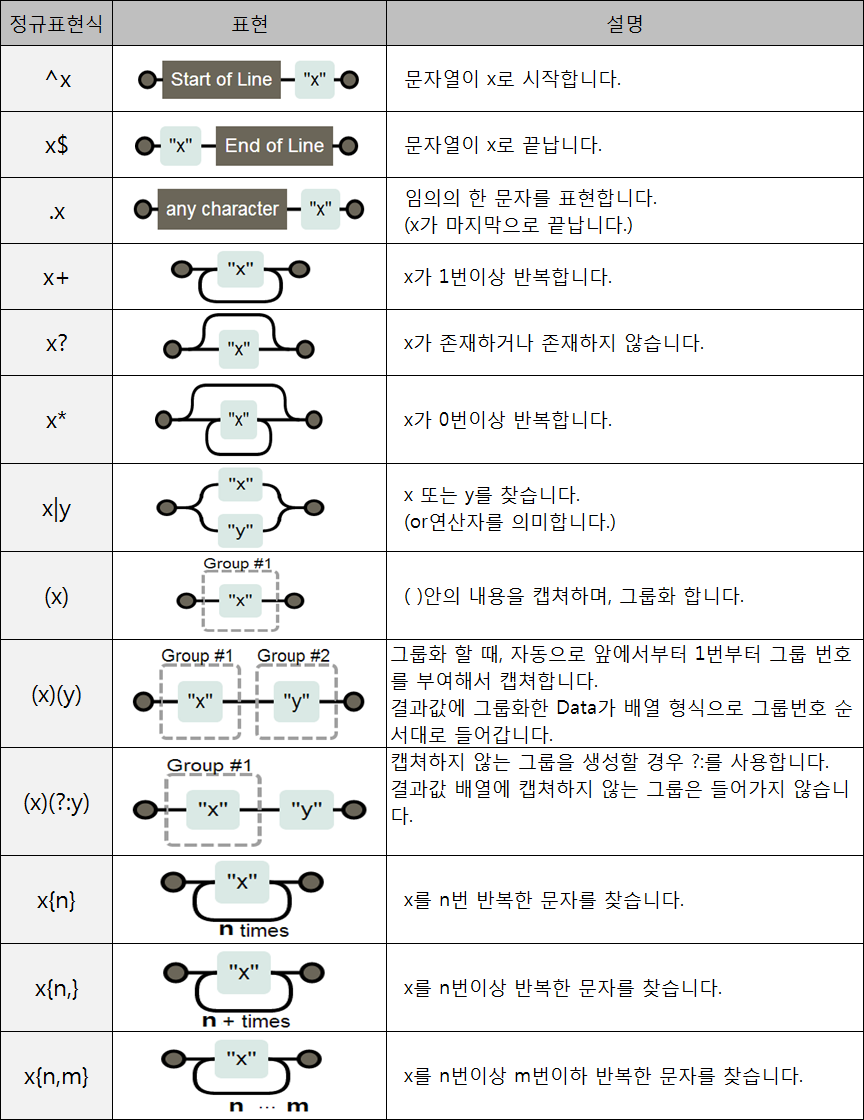

## re module

파이썬 re 모듈은 메타 문자를 사용해서 정규 표현식으로 패턴을 탐색해 결과를 MatchObject 로 반환해준다.

1. [re.match()](#match())    : 문자열의 처음부터 정규식과 매치되는지 조사한다.
1. [re.search()](#search())   : 문자열 전체를 검색하여 정규식과 매치되는지 조사한다.
1. [re.findall()](#findall())  : 정규식과 매치되는 모든 문자열(substring)을 리스트로 리턴한다
1. [re.finditer()](#finditer()) : 정규식과 매치되는 모든 문자열(substring)을 iterator 객체로 리턴한다


In [7]:
import re

### `search()` 메서드

패턴으로 검색해 일치하는 첫번째 문자열을 [MatchObject](https://docs.python.org/3/library/re.html#match-objects)를 반환한다.


```Python
<re.MatchObject> = re.search(pat, string, flag=0)
```

##### Match object

MatchObject 객체 메소드:

- `group()` : 일치하는 결과를 하나의 문자열(str)로 반환.
- `groups()`: 일치하는 모든 결과를 tuple 형태로 반환.
- `groupdict()`: 결과를 딕셔너리로 반환
- `expand()`:
- `span([group])` : 튜플 m.start(group),m.end(group) 반환
    - start()	매치 시작지점 인덱스 출력
    - end()	매치 끝지점 인덱스 출력
    - span()	(start(), end())를 튜플로 출력


In [4]:
# 문자열에서 p 문자가 일치하는지, 대소문자 무시
str = "Hello Python Programming"




P


예) 에러 로그에서 특정 

In [10]:
# 에러로그에서 특정 패턴 검색
text = "에러 1122 : 레퍼런스 오류\n 에러 1033: 아규먼트 오류"






에러 1033


### RAW string notation

정규 표현식 패턴 사용할 때 / 가 많이 사용되는데 파이썬에서는 raw 문자열 표현인 r'....' 을 사용해서 문자열 리터럴을 사용하면 백슬래시가 회피 문자로 사용되지 않는다.

> 메타문자 `\` 사용시 Raw string 사용 권장한다. 파이썬에서 '\b' 리터럴은 백스페이스이다

C++11에서 지원되기 시작한 raw string literal 기능이 파이썬에는 이미 포함되어 있다. 정규식 문자열 앞에 r문자를 선행하면 이 정규식은 Raw String 규칙에 의하여 백슬래시 2개 대신 1개만 써도 두개를 쓴것과 동일한 의미를 갖게된다.
 -  http://sweeper.egloos.com/3059035



raw string 사용 안한 경우의 `\` 문자를 만나면 에러가 난다.

In [7]:
# 회피문자를 포함한 문자열

re.search('', 'They classify the group').group()

AttributeError: 'NoneType' object has no attribute 'group'

In [8]:
# 회피문자를 포함한 문자열은 raw string 리터럴

re.search(r'', 'this class, that class').group()

'class'

#### 회피문자

grep, vi 등과 달리, 파이썬 문자열 리터럴 규칙에서 정규식 사용시 '\'를 사용하기 위해, 회피문자 '\\'는 '\'로 변경된다. 

문자열 "\section" 을 검색하려고 아래같이 패턴을 실행하면 에러가 난다.

```python
>>> re.match("\section", "This \section is ").group()
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-46-745cea5c7d31> in <module>()
----> 1 re.match("\section", "This \section is ").group()

AttributeError: 'NoneType' object has no attribute 'group'
```

이것은 '\s' 회피문자로 해석된다. 그래서 '\\' 전달되려면 '\\\\'으로 회피해야 한다. 

In [9]:
# 문자 `\` 를 회피문자로 사용

re.search(r"", "This \section is ").group()

'\\section'

### `match()` 메서드

match 메쏘드는 주어진 string의 첫 문자열만을 비교하여 pattern과 match 되는지를 확인한다. 따라서, search와 다르게 string의 처음부터 일치하여야만 가능하다.

```python
<match object> = re.match(pattern, string, flag=0)
```



In [5]:
# '에러'
text = "에러 1122 : 레퍼런스 오류\n 에러 1033: 아규먼트 오류"

m = re.match("       ", text)

if m != None:
    print(m.group())

에러 


### `findall()`

패턴과 일치하는 모든 것을 반환

```[list of groups] = re.findall(pattern, string, flag=0)```


다음은 일치하는 모든 gorups의 리스트

In [6]:
# 이메일의 @
log = "Primary email : SooKkaRak@gmail.com\nSecondary email : Sweeper@yahoo.com"






@
@


### `finditer()`

In [18]:
# 'o'
result = re.finditer("", "life is too short")
print(result)

In [19]:
for r in result:
    print(r)

<re.Match object; span=(9, 10), match='o'>
<re.Match object; span=(10, 11), match='o'>
<re.Match object; span=(14, 15), match='o'>


### compile()

정규식을 여러번 사용시 반복적인 정규식을 쓰지 않고 compile해서 re.RegexObject 객체로 저장

다음은 이메일 주소 패턴을 compile해서 사용하는 예제이다.

In [20]:
# 이메일 패턴 컴파일
email_pat = re.compile(r"(\w+[\w\.]*)@(\w+[\w\.]*)\.([A-Za-z]+)")

m = re.search(email_pat, "My email address is gangtai.goh@gmail.com")
print(m.group())

gangtai.goh@gmail.com


### Quantifiers: `*`, `+`, `?` 와 `{}`

 - `.`: 줄바꿈 문자를 제외한 모든 문자와 일치한다.
 - `?`: 직전문자 0,1회 반복, 앞 문자가 있어도되고 없어도 된다. {0,1} 의미
 - `*`: 바로 앞 문자가 0번에서 무한 반복한다.
 - `+`: 앞 문자가 최소 1번 이상 반복 될 때.

In [33]:
# abc
re.match('a.', 'abc').group()

'ab'

`*` 반복은 앞 문자가 0번에서 무한 반복하는 의미이다.

In [34]:
# ct
re.match('ca*t', 'ct').group()

'ct'

In [35]:
# caat
re.match('ca*t', 'caat').group()

'caat'

In [36]:
# ca0t
re.match('ca*t', 'ca0t').group() # 숫자로 일치하지 않는다.

AttributeError: 'NoneType' object has no attribute 'group'

`+` 반복은 앞에 일치하는 문자가 1회 이상 있어야 가능하다.

In [37]:
# cat
re.match('ca+t', 'cat').group()

'cat'

In [38]:
# caat

re.match('ca+t', 'caat').group()

'caat'

In [39]:
# ct
re.match('ca+t', 'ct').group()  # a가 0번 반복하고 있다.

AttributeError: 'NoneType' object has no attribute 'group'

### 반복횟수 `({m,n},?)

메타문자 `{m}` 그리고 `{m,n}`로 반복회수 m부터 n까지 지정할 수 있다.

`{m}` 으로 반복횟수를 지정한다.

In [41]:
# caat
re.match('ca{2}t', 'caat').group()    #a가 2회 반복

'caat'

In [42]:
# caaat

re.match('ca{2}t', 'caaat').group()    #3회 반복으로 false

AttributeError: 'NoneType' object has no attribute 'group'

`{m,n}` m에서 n회 사이 반복

In [43]:
# caaat
re.match('ca{2,}t', 'caaat').group()    #a가 2번 이상 반복

'caaat'

In [44]:
# caat

re.match('ca{2,3}t', 'caat').group()    #2~3회 반복
# re.match('ca{2,3}t', 'caaaat').group()    #4회 반복으로 false

'caat'

In [46]:
# caaaat

re.match('ca{2,5}t', 'caaaat').group()    #a가 2~5회 반복

'caaaat'

#### 0~1회 반복 `?`

0,1 회 반복

In [44]:
# abc

re.match('ab?c', 'abc').group()

'abc'

In [45]:
# abc

re.match('ab?c', 'ac').group()

'ac'

## 문자 클래스 사용

Meta 문자중에 독특한 성질을 지니고 있는 문자클래스`[]` 가 있다. 문자클래스는 그 내부에 해당하는 문자열의 범위 중 한 문자만 선택한다는 의미, 문자클래스 내부에서는 Meta문자를 사용할 수 없거나 의미가 다르게 사용된다.

즉 문자 클래스로 만들어진 정규식은 "[] 사이의 문자들과 매치"라는 의미를 갖는다.


http://www.nextree.co.kr/p4327/

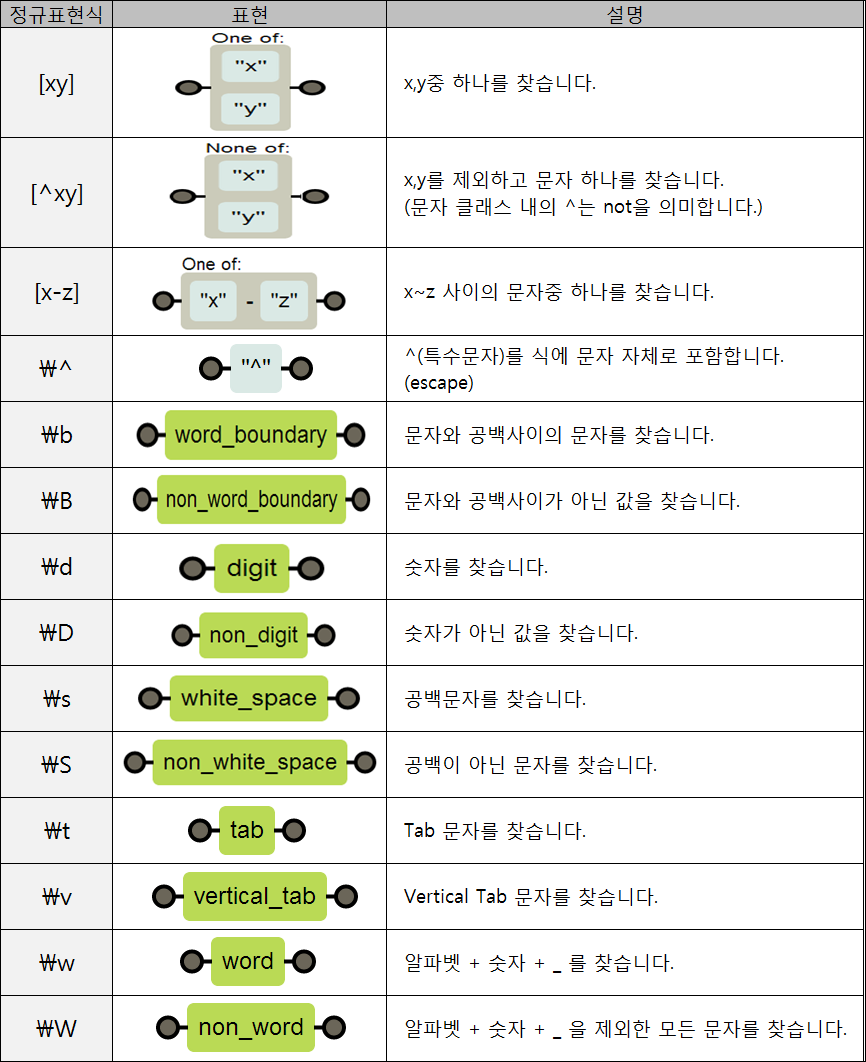

In [16]:
# [ags]

text = "Python regular expression"

m = re.search(r'[ags]', text)
m.group()

'g'

#### 자주사용하는 문자 클래스

- `[0-9]`: 숫자
- `[a-zA-Z]`, `[가-흫]`: 알파벳, 한글
- `\d` - 숫자와 매치, [0-9]와 동일한 표현식이다.
- `\D` - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
- `\s` - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
- `\S` - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
- `\w` - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
- `\W` - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.

단, 문자 클래스 안에 `^` 메타 문자는 반대(not)라는 의미를 갖는다. 예) `[^0-9]` 는 숫자가 아닌 문자만 매치된다.

---
# 참조

 - https://soooprmx.com/archives/7718
 - https://wikidocs.net/4308




### 정규표현식 실습

1. http://www.regexper.com/
2. http://gskinner.com/RegExr/

